<a href="https://colab.research.google.com/github/jenniferamhajduk/AIML_Playground/blob/main/Custom_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

@InProceedings{cimpoi14describing,
	      Author    = {M. Cimpoi and S. Maji and I. Kokkinos and S. Mohamed and and A. Vedaldi},
	      Title     = {Describing Textures in the Wild},
	      Booktitle = {Proceedings of the {IEEE} Conf. on Computer Vision and Pattern Recognition ({CVPR})},
	      Year      = {2014}}

In [ ]:
!pip install torchrec

In [ ]:
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from torchvision.transforms import ToTensor, transforms
from torchvision import datasets
from torch.utils.data import DataLoader
torch.__version__

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
BATCH_SIZE=32
EPOCHS=10

In [ ]:
!nvidia-smi

In [ ]:
transform = transforms.Compose([
    transforms.Resize((640, 480)),
    transforms.ToTensor()
])

In [50]:
train_data = datasets.DTD(
    root="data",
    split="train",
    partition=1,
    transform=transform,
    target_transform=None,
    download=True
)

test_data = datasets.DTD(
    root="data",
    split="test",
    partition=1,
    transform=transform,
    target_transform=None,
    download=True
)

val_data = datasets.DTD(
    root="data",
    split="val",
    partition=1,
    transform=transform,
    target_transform=None,
    download=True
)

100%|██████████| 625239812/625239812 [00:21<00:00, 28921444.13it/s]


Extracting data/dtd/dtd-r1.0.1.tar.gz to data/dtd


In [51]:
len(train_data), len(test_data), len(val_data)

(1880, 1880, 1880)

In [52]:
image, target = train_data[0]

In [53]:
image, target

(tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.9961, 1.0000, 0.9961],
          [1.0000, 1.0000, 1.0000,  ..., 0.9961, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.9961, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9961, 0.9961],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9961, 0.9961],
          [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9961]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 0.1412, 0.0039, 0.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.1412, 0.0039, 0.0039],
          [1.0000, 1.0000, 1.0000,  ..., 0.1412, 0.0039, 0.0039],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 0.1451, 0.0039, 0.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.1412, 0.0039, 0.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.1412, 0.0039, 0.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 0.5490, 0.4941, 0.4941],
          [1.0000, 1.0000, 1.0000,  ..., 0.5490, 0.4980, 0.4941],
          [1.0000, 1.0000, 1.0000,  ...,

In [54]:
image.shape

torch.Size([3, 256, 256])

In [55]:
classes = train_data.classes
classes

['banded',
 'blotchy',
 'braided',
 'bubbly',
 'bumpy',
 'chequered',
 'cobwebbed',
 'cracked',
 'crosshatched',
 'crystalline',
 'dotted',
 'fibrous',
 'flecked',
 'freckled',
 'frilly',
 'gauzy',
 'grid',
 'grooved',
 'honeycombed',
 'interlaced',
 'knitted',
 'lacelike',
 'lined',
 'marbled',
 'matted',
 'meshed',
 'paisley',
 'perforated',
 'pitted',
 'pleated',
 'polka-dotted',
 'porous',
 'potholed',
 'scaly',
 'smeared',
 'spiralled',
 'sprinkled',
 'stained',
 'stratified',
 'striped',
 'studded',
 'swirly',
 'veined',
 'waffled',
 'woven',
 'wrinkled',
 'zigzagged']

In [56]:
len(classes)

47

Text(0.5, 1.0, 'braided')

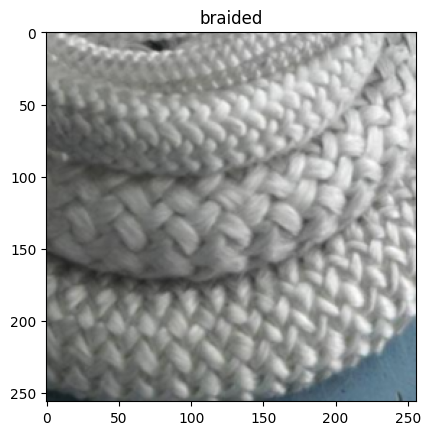

In [57]:
image, label = train_data[100]
image = image.squeeze(dim=1)
image = image.numpy()
image = image.transpose(1,2,0)
plt.imshow(image)
plt.title(classes[label])

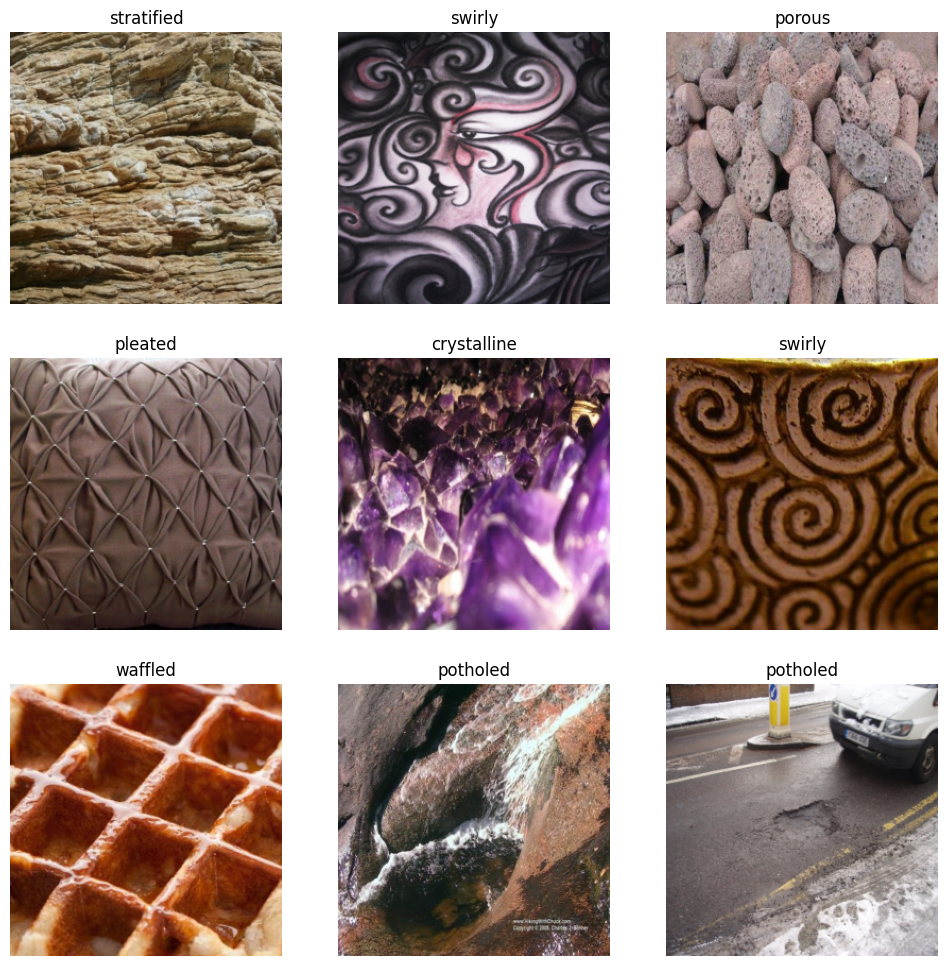

In [58]:
fig = plt.figure(figsize=(12,12))
rows, cols = 3, 3
for i in range(1, rows*cols+1):
  rand_idx = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[rand_idx]
  image = image.numpy()
  image = image.transpose(1,2,0)
  fig.add_subplot(rows, cols, i)
  plt.imshow(image)
  plt.title(classes[label])
  plt.axis(False)

In [ ]:
new_image_size = (640,480)
for image, label in train_data:
  image = image.numpy()
  image = image.transpose(1,2,0)
  image = cv2.resize(image, new_image_size)



In [ ]:
for image, label in train_data:
  print(image.numpy().shape)

In [ ]:
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

val_dataloader = DataLoader(
    dataset=val_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [ ]:
train_dataloader, test_dataloader, val_dataloader

In [ ]:
train_features, train_labels = next(iter(train_dataloader))

In [ ]:
!rm -rf data